In [1]:
#Formalities (Dependencies and such)
import time
import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy 
import json
import requests
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
#Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Getting Started
news_sources = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
files = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [4]:
#Our Main Function
def Sentimentalfunction(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 200 )
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)  
    return  data

In [5]:
#Running our Main Function
BBCsentiment = Sentimentalfunction('@BBC')
CBSsentiment = Sentimentalfunction('@CBS')
CNNsentiment = Sentimentalfunction("@CNN")
FOXsentiment = Sentimentalfunction("@FoxNews")
NYTsentiment = Sentimentalfunction("@nytimes")

In [6]:
#CSV Saves
BBCsentiment.to_csv('CSVs/BBCcsv.csv')
CBSsentiment.to_csv('CSVs/CBScsv.csv')
CNNsentiment.to_csv('CSVs/CNNcsv.csv')
FOXsentiment.to_csv('CSVs/FOXcsv.csv')
NYTsentiment.to_csv('CSVs/NYTcsv.csv')


In [47]:
#Testing
print(NYTsentiment)

     Compound                            Date  Negative  Neutral  Positive  \
199    0.4019  Tue Oct 02 15:00:12 +0000 2018     0.000    0.876     0.124   
198    0.0000  Tue Oct 02 15:15:08 +0000 2018     0.000    1.000     0.000   
197    0.0000  Tue Oct 02 15:30:13 +0000 2018     0.000    1.000     0.000   
196    0.2500  Tue Oct 02 15:45:05 +0000 2018     0.000    0.905     0.095   
195   -0.4939  Tue Oct 02 16:00:11 +0000 2018     0.138    0.862     0.000   
194    0.0000  Tue Oct 02 16:10:04 +0000 2018     0.000    1.000     0.000   
193    0.0000  Tue Oct 02 16:20:03 +0000 2018     0.000    1.000     0.000   
192    0.0000  Tue Oct 02 16:30:11 +0000 2018     0.000    1.000     0.000   
191    0.0000  Tue Oct 02 16:40:07 +0000 2018     0.000    1.000     0.000   
190   -0.6908  Tue Oct 02 16:50:04 +0000 2018     0.231    0.769     0.000   
189    0.8658  Tue Oct 02 17:00:12 +0000 2018     0.000    0.650     0.350   
188    0.5859  Tue Oct 02 17:10:02 +0000 2018     0.000    0.769

In [48]:
#Function to streamline scatterplotting
def Scatterfunction(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

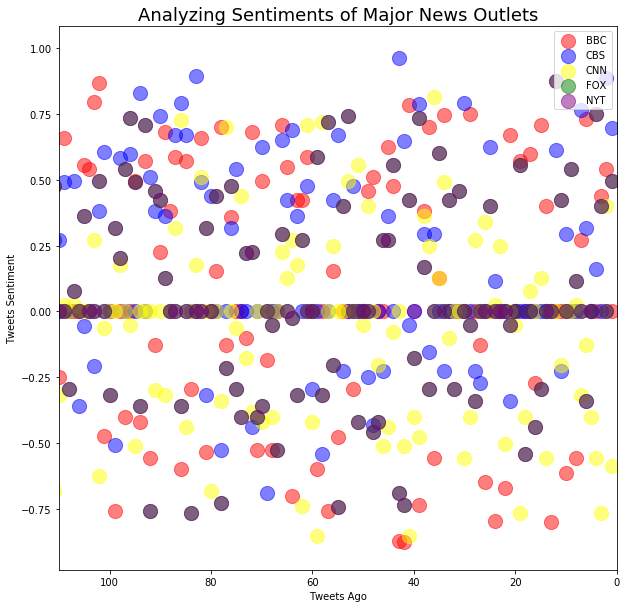

In [53]:
#Running our scatterplotting function

plt.figure(figsize =(10,10))

Scatterfunction(BBCsentiment['Tweets ago'], bbc_sentiment['Compound'], "r", 'BBC')
Scatterfunction(CBSsentiment['Tweets ago'], cbs_sentiment['Compound'], "b", 'CBS')
Scatterfunction(CNNsentiment['Tweets ago'], cnn_sentiment['Compound'], "yellow", 'CNN')
Scatterfunction(FOXsentiment['Tweets ago'], fox_sentiment['Compound'], "g", 'FOX')
Scatterfunction(NYTsentiment['Tweets ago'], fox_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "upper right")
plt.title("Analyzing Sentiments of Major News Outlets" ,fontsize = 18)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweets Sentiment")
plt.xlim(110,-0.05)
plt.savefig("Figures/Figure_1.png")


plt.show()



In [50]:
#Dictionary
dict_x =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }
print(dict_x)

{'BBC': 0.12783199999999995, 'CBS': 0.148479, 'CNN': -0.03383499999999999, 'FOX': 0.011404500000000001, 'NYT': -0.057478000000000036}


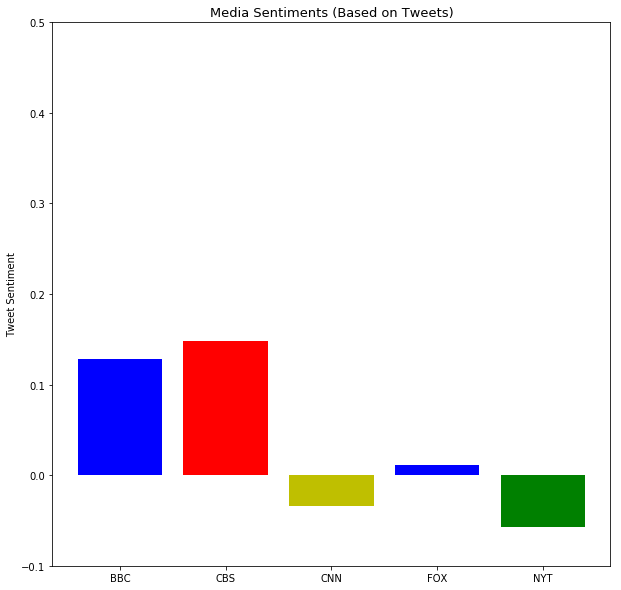

In [54]:
#Bargraph
plt.figure(figsize = (10,10))
plt.bar(dict_x.keys(), dict_x.values(), color = ['b', 'r', 'y', 'b', 'g'])
plt.title('Media Sentiments (Based on Tweets)', fontsize = 13)
plt.ylabel("Tweet Sentiment")
plt.ylim(-0.1, 0.5)
plt.savefig("Figures/Figure_2.png")

plt.show()
